# 1 Transforming Data (5 pts)
The ratings.csv file contains user ratings, one movie per line. See the README file for
more information.
Transform the data into a user-movie ratings matrix. There should be 610 rows (one
for each user) and 9,742 columns (one for each movie). Each cell should contain the users
rating for that movie. Note that not every user has rated every movie. Assign a value of
0 for any missing values.




In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd


In [49]:
RATINGS_FILE_NAME = "ratings.csv"
MOVIES_FILE_NAME = "movies.csv"
ratings_df = pd.read_csv(RATINGS_FILE_NAME)
movies_df = pd.read_csv(MOVIES_FILE_NAME)

#Checked
userid_unique = ratings_df["userId"].unique().tolist()
movieid_unique = movies_df["movieId"].unique().tolist()
# print(len(userid_unique))
# print(len(movieid_unique))

new_df = pd.DataFrame(0, columns=movieid_unique, index=userid_unique)
for i in range(len(ratings_df)):
    new_df.loc[ratings_df.loc[i, "userId"],ratings_df.loc[i, "movieId"]] = ratings_df.loc[i, "rating"]

print(new_df)

new_df.to_csv("userXmovie.csv")


     1       2       3       4       5       6       7       8       9       \
1       4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0     0.0   
2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
606     2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0     0.0   
607     4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608     2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0     0.0   
609     3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610     5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.0     0.0   

     10      ...  193565  193567  193571  193573  1

## REPORT OF NUMBER 1:

In ratings.csv, not all data of movie are presented(9724 of 9742 are picked)
So, I got data from movies.csv, so as to make columns in it.



***

# 2 Principle Component Analysis (15 pts)

Apply PCA to the reduce the dimensionality of the movies.
(a) Transpose the matrix from Q1 so that rows refer to movies and columns refer to users.
Mean center the data. Note that you will only use this transformed, mean-centered
data for this question.
(b) Apply PCA with number of components k = 2 to reduce the dimensionality of the
movies.
(c) Plot the results and color each movies by its genre. Genres for each movie are listed
in movies.csv. Since each movie may have more than one genre, to simplify just use
the first genre in the list. Discuss what patterns you see in the visualization.
(d) Determine the “intrinsic” dimensionality of the movies, by finding the number of principle components that are needed to explain 80% of the variance of the data. Discuss
how this compares to k = 2 and how this may impact the quality of the visualization
above.

            0    1    2    3    4    5    6    7    8     9    ...    600  \
Unnamed: 0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  ...  601.0   
1           4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0   0.0  ...    4.0   
2           0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0   0.0  ...    0.0   
3           4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0   0.0  ...    0.0   
4           0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0   0.0  ...    0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...   
193581      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
193583      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
193585      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
193587      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
193609      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   

              601    602    603    604    605    606    607    608    609  

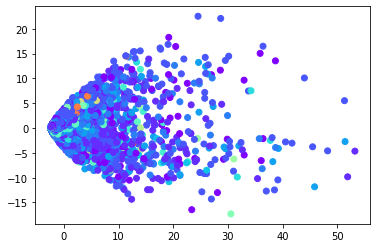

2 [23.09605464  5.48863517]
2 [0.17627568 0.04189083]
3 [23.09605464  5.48863517  3.50857041]
3 [0.17627568 0.04189083 0.02677841]
4 [23.09605464  5.48863517  3.50857042  2.75247723]
4 [0.17627568 0.04189083 0.02677841 0.02100769]


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RATINGS_FILE_NAME = "ratings.csv"
MOVIES_FILE_NAME = "movies.csv"
Q1_PROCESSED = "userXmovie.csv"
ratings_df = pd.read_csv(RATINGS_FILE_NAME)
movies_df = pd.read_csv(MOVIES_FILE_NAME)
user_rating_df = pd.read_csv(Q1_PROCESSED)

def transpose_dataframe(df):
    df = df.transpose()
    print(df)
    df = df.drop(["Unnamed: 0"])
    return df

# Making Mean centered data
def mean_centered(df):
    return df-df.mean()

def check_mean_centered(df):
    print(df.sum().sum())

def make_PCA(df):
    principal = PCA(n_components=2)
    principal_components = principal.fit_transform(df)
    principaldf = pd.DataFrame(data=principal_components, columns=["component1", "component2"])
    principaldf.insert(0, "movieId", df.index, True)
    principaldf["movieId"] = pd.to_numeric(principaldf["movieId"])

    return principaldf

def merge_movie(df1, df2):
    target_df = pd.merge(df1, df2, left_on="movieId", right_on="movieId", how='inner')
    target_df = target_df.sort_values("movieId")

    return target_df

def postprocess(df):
    df["genres"] = df["genres"].str.split("|").str[0]
    genre = df["genres"].tolist()
    unique_genre = df["genres"].unique().tolist()
    genre_dict = {string: i for i, string in enumerate(unique_genre)}
    genre_id = []
    for i in range(len(genre)):
        genre_id.append(genre_dict[genre[i]])

    return df, genre_id

def visualize(merged_df, genre_id):
    plt.scatter(merged_df["component1"].tolist(), merged_df["component2"].tolist(), c=genre_id, cmap=plt.cm.rainbow)
    plt.show()

def PCA_variance_for_d(df):
    pca = PCA(300)
    pca.fit(df)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= 0.95) + 1
    print(d)


df              = transpose_dataframe(user_rating_df)
df              = mean_centered(df)
principaldf     = make_PCA(df)
merged_df       = merge_movie(principaldf, movies_df)
merged_df, genre_id = postprocess(merged_df)
visualize(merged_df, genre_id)

PCA_variance_for_d(df)

## REPORT OF NUMBER 2

(c) via scatteded plot, we could see that there's relationship by two component, looking as fish shape.

(d) It could not make 80% of variance, but PCA dimension over 2 is lossful, so that 2 is best for result.

***

# 3 Clustering (15 pts)
Apply k-means clustering to the data from Q1 (rows=users, columns=movies, no meancentering) and cluster the users.
(a) For values of k = [2, 4, 8, 16, 32], apply k-means and measure the inertia for each
value of k. Plot the resulting inertia scores for each choice of k.
(b) From the above results, choose an appropriate value of k from the plot and support
your choice.
(c) Cluster the data again with your chosen value of k. For each of the resulting clusters,
find the top three movies that are highest rated (on average) by the users in the cluster.
Report the movie titles and discuss whether the results seem reasonable (i.e., do the
top-rated movies in each cluster seem to correspond to recognizable groups).

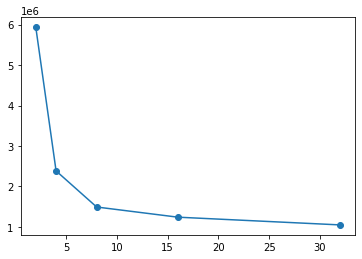

1196	1198	1	589	
2959	527	110	50	
110	47	1210	1196	
110	480	527	2959	


In [51]:
filename = "userXmovie.csv"
df = pd.read_csv(filename)

inertias=[]
def kmean(n_cluster, df):
    model = KMeans(n_clusters=n_cluster, algorithm="auto")
    model.fit(df)
    predict = pd.DataFrame(model.predict(df))
    predict.columns = ["predict"]
    df_labeled = pd.concat([df, predict], axis=1)
    inertias.append(model.inertia_)
    return df_labeled

def top10(df_target):
    df_target.loc[-1] = df_target.mean(0)
    df_target.index = df_target.index + 1  # shifting index
    df_target = df_target.sort_index()
    idx = df_target.columns.tolist()
    key = df_target.loc[0].tolist()
    top10list= np.array(key).argsort()[-10:][::-1]
    for i in top10list:
        if idx[i] not in ["318", "356", "296", "593", "2571", "260"]:
            print(idx[i], end="\t")
    print("")



labels = [2, 4, 8, 16, 32]
for i in labels:
    _ = kmean(i, df)

plt.plot(labels, inertias, '-o')
plt.show()

df_labeled = kmean(4, df)
for i in range(4):
    temp_df = df_labeled.loc[df_labeled["predict"]==i]
    temp_df = temp_df.drop(["predict"], axis=1)
    temp_df = temp_df.drop(["Unnamed: 0"], axis=1)
     # sorting by index
    #temp_df = temp_df.sort_values("average", ascending=False)
    globals()["df{}".format(i)] = temp_df

#Change 0 ~ 7 in order to find best 3.

top10(df0)
top10(df1)
top10(df2)
top10(df3)

## Report 3
(b) I choosed k as 4. We could easily figure that graph falls rapidly when clusters are in 2 and 4.

(c) As "318", "356", "296", "593 "2571", "260" movies are popular among all cluster, deleted all these movies

    Cluster1: 110, 480, 527, 2959 (Action|Drama|War, Action|Adventure|Sci-Fi|Thriller, Drama|War, Action|Crime|Drama|Thriller)

    CLuster2: 1, 1196, 1198, 2858(Adventure|Animation|Children|Comedy|Fantasy, Action|Adventure|Sci-Fi, Action|Adventure, Drama|Romance)

    CLuster3: 47, 110, 1196, 1210(Mystery|Thriller, Action|Drama|War, Action|Adventure|Sci-Fi, Action|Adventure|Sci-Fi)

    CLuster4: 50, 110, 527, 2959(Crime|Mystery|Thriller, Action|Drama|War, Drama|War, Action|Crime|Drama|Thriller)

    Most Cluster has "action, Drama, war", so that such relationship could not be obviously discovered.
    But, Cluster 4 seems related to Crime





***

# 4 Singular Value Decomposition (15 pts)
Apply SVD to the user-movie matrix from Q1 (rows=users, columns=movies, no meancentering).
(a) Apply SVD with number of components k = 32. Plot the resulting singular values.
(b) For each of the values of k = [2, 4, 8, 16, 32] considered above, report the sum of the
explained variance ratio. Discuss how the results compare to the inertia values
above and whether it supports your choice of k.
(c) Apply SVD with k = 2 and transform the data.
(d) Plot the results (for k = 2) and color the users by the cluster memberships you found
above. Discuss any patterns you can see and compare them to the previous analysis
(either from clustering or PCA).

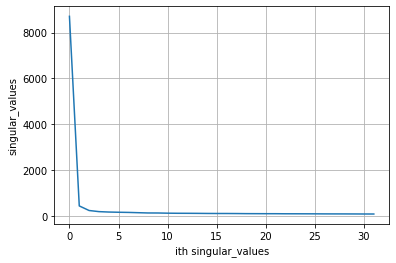

====== (b) sum of explained_variance_ratio ======
[ K = 2 ]	 0.9478402074272655
[ K = 4 ]	 0.9520917195586229
[ K = 8 ]	 0.9565212181328732
[ K = 16 ]	 0.9613540058292592
[ K = 32 ]	 0.9673849140590275

====== (c) transformed data using svd, k=2 ======
[[  2.10365109  29.04608333]
 [  2.12607167   2.86035284]
 [  3.02314157   0.63557942]
 ...
 [609.78383097  41.06835556]
 [608.77490206 -18.65464664]
 [612.12159193  55.42658528]]


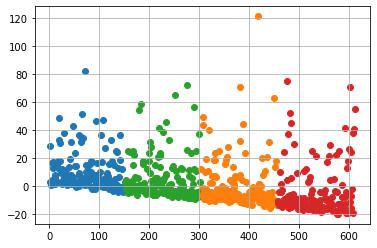

In [52]:
USER_MOVIE_FILE_NAME = "userXmovie.csv"
df = pd.read_csv(USER_MOVIE_FILE_NAME)


# =========== (a) Apply SVD, Plot the resulting singular_values =========== #
# calculated truncated SVD for top k sigular values
k = 32
svd_32 = TruncatedSVD(n_components=k)
svd_32.fit(df)

#  Plot the resulting singular_values
plt.plot(svd_32.singular_values_)
plt.xlabel('ith singular_values')
plt.ylabel('singular_values')
plt.grid()
plt.show()




# =========== (b) report the sum of the explained_variance_ratio
#                                       for k = [2, 4, 8, 16, 32] =========== #
k = [2, 4, 8, 16, 32]
print ("====== (b) sum of explained_variance_ratio ======")
# calculated sum of each explained_variance_ratio using truncated SVD for k
for i in range(len(k)):
    svd = TruncatedSVD(n_components=k[i])
    svd.fit(df)
    print("[ K =", k[i], "]\t", svd.explained_variance_ratio_.sum())
print ("=================================================\n")




# =========== (c) Apply SVD with k = 2 and transform the data =========== #
# Apply SVD with k = 2
k = 2
svd_2 = TruncatedSVD(n_components=k)
svd_2.fit(df)

# transform the data
svd_2_transformed = svd_2.fit_transform(df)

print ("====== (c) transformed data using svd, k=2 ======")
print(svd_2_transformed)
print ("=================================================")




# =========== (d) Plot the results, and color the users =========== #
# find cluster memberships I found above (# of Cluster = 8)
N_CLUSTER = 4
model = KMeans(n_clusters=N_CLUSTER, algorithm="auto")
model.fit(df)
person_cluster_info = model.predict(df)

# Plot the results (for k = 2) and color the users
COLOR_BY_CLUSTER = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for i in range(len(svd_2_transformed)):
    plt.scatter(svd_2_transformed[i][0], svd_2_transformed[i][1],
                color=COLOR_BY_CLUSTER[person_cluster_info[i]])
plt.grid()
plt.show()

## Report 4